In [ ]:
pip install nltk

In [ ]:
# pandas is a data manipulation and analysis library. It provides data structures and functions to work with structured data, like dataframes.
import pandas as pd

# Matplotlib is a widely-used plotting library in Python. It is used for creating data visualizations and plots.
import matplotlib.pyplot as plt

# Seaborn is a data visualization library built on top of Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.
import seaborn as sns

#library that contains punctuation
import string
string.punctuation

#library for regular espression
import re

#importing nlp library for removing stopwords
import nltk
nltk.download('stopwords')

#importing nlp library for performing stemming
from nltk.stem.porter import PorterStemmer

#importing nlp library for performing Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# scikit-learn (sklearn) is a popular machine learning library. TfidfVectorizer is used to convert text data into numerical features using TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer

# sklearn's train_test_split function is used to split your dataset into training and testing subsets, a common practice in machine learning.
from sklearn.model_selection import train_test_split

# RandomForestClassifier is a machine learning model from sklearn used for classification tasks. It's an ensemble model based on decision trees.
from sklearn.ensemble import RandomForestClassifier

# sklearn.tree provides the DecisionTreeClassifier, a class for creating decision tree models for classification tasks in machine learning.
from sklearn.tree import DecisionTreeClassifier

# sklearn.metrics provides functions for evaluating and reporting model performance.
# accuracy_score is used to calculate the accuracy of a classification model,
# and classification_report generates a detailed report with various evaluation metrics.
from sklearn.metrics import accuracy_score, classification_report

# sklearn.metrics provides various evaluation metrics for machine learning models. confusion_matrix is used to assess classification model performance.
from sklearn.metrics import confusion_matrix

### About Dataset
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet

Kaggle Link : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [ ]:
data = pd.read_csv("spam.csv",encoding="ISO-8859-1")
print(data.head())

In [ ]:
#expanding the dispay of text sms column
#using only v1 and v2 column
data= data [['v1','v2']]
data.head()

In [ ]:
help(pd.set_option)

In [ ]:
data['v1'].value_counts()

In [ ]:
data.v1.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Messgae Spam or Ham")
plt.xticks(rotation = 0)
plt.ylabel("Count")
plt.show()

### Punctation Removal

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree = ""
    for char in text:
        if char not in string.punctuation:
            punctuationfree += char
    return punctuationfree

#storing the puntuation free text
data['clean_msg']= data['v2'].apply(lambda x:remove_punctuation(x))
data.head()

### Lowercasing the Text

In [ ]:
def lowercase_text(text):
    return text.lower()

data['msg_lower'] = data['clean_msg'].apply(lowercase_text)
data

#### Tokenization

In [ ]:
#defining function for tokenization
import re
def tokenization(text):
    # The regular expression r'\W+' is used as the split pattern. This pattern splits the text at one or more non-word characters (e.g., whitespace, punctuation, etc.).
    tokens = re.split(r'\W+',text)
    return tokens

#applying function to the column
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))
data

### Removal of Stopwords

In [ ]:
#importing nlp library
import nltk

nltk.download('stopwords')

In [ ]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
print("Preview of Stopwords Corpus : ", stopwords[0:10])

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
data['no_stopwords']= data['msg_tokenied'].apply(lambda x:remove_stopwords(x))
data

In [ ]:

porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = []
    for word in text:
        stem_word = porter_stemmer.stem(word)
        stem_text.append(stem_word)
    return stem_text

data['msg_stemmed'] = data['no_stopwords'].apply(stemming)
data

### Lemmatization

In [ ]:
# Defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# Defining the function for lemmatization
def lemmatizer(text):
    lemm_text = []
    for word in text:
        lemm_word = wordnet_lemmatizer.lemmatize(word)
        lemm_text.append(lemm_word)
    return lemm_text

# Applying the lemmatization function to the column
data['msg_lemmatized'] = data['no_stopwords'].apply(lemmatizer)
data

#### Converting the column from list to string so that TFID Vectorizer can work

In [ ]:
# Assuming 'msg_lemmatized' column contains lists of lemmatized words, convert them to strings
data['msg_lemmatized'] = data['msg_lemmatized'].apply(lambda x: ' '.join(x))
data

### TFID VECTORIZER

TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic that reflects the importance of a word within a document or a corpus of documents. TF-IDF is commonly used in information retrieval and text mining to determine the relevance of a term within a document relative to a collection of documents.

**Term Frequency (TF):**

>1. TF measures how frequently a term (word) occurs in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in that document.

>2. TF is designed to represent the importance of a term within a single document.

**Inverse Document Frequency (IDF):**

>1. IDF measures how unique or rare a term is across a collection of documents (corpus). It is calculated as the logarithm of the total number of documents in the corpus divided by the number of documents containing the term.

>2. IDF is designed to penalize terms that are too common and, therefore, not informative.





In [ ]:
# Feature Extraction
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['msg_lemmatized'])
y = data['v1']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree
A decision tree is a machine learning algorithm that represents decision-making through a tree-like structure. It's highly interpretable and can be used for both classification and regression tasks. Decision trees split nodes based on input features and provide predictions at leaf nodes. They are versatile, suitable for visual representation, and can be used independently or in ensemble methods for various applications. Decision Tree looks something like this.


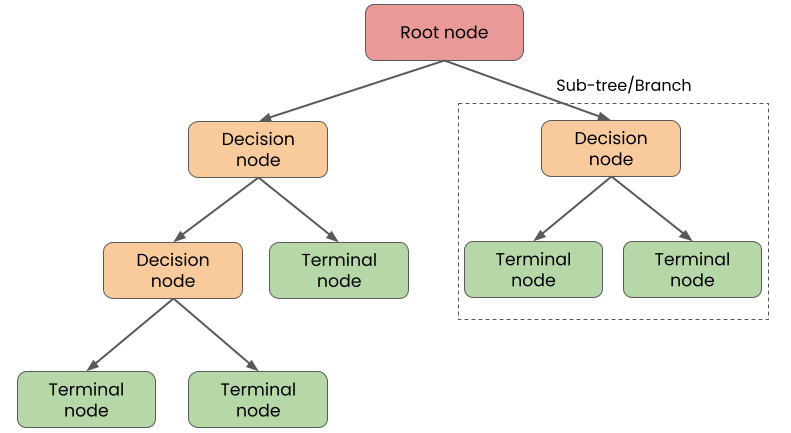

In [ ]:
# Model Building | Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


### Confusion Matrix

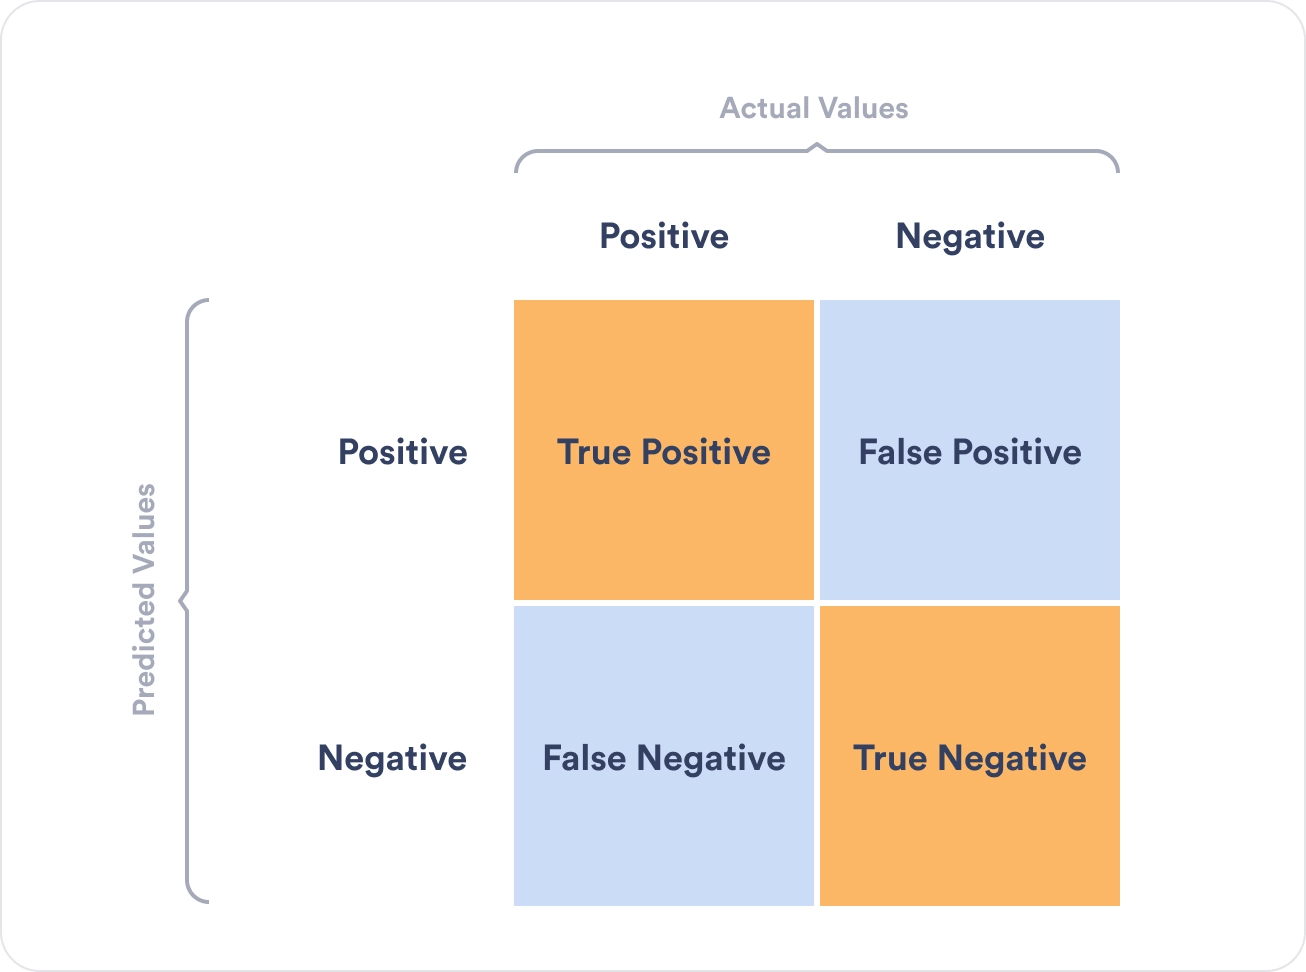

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

### Random Forest Classifier
A Random Forest classifier is an ensemble learning method in machine learning that combines multiple decision trees to improve predictive accuracy and reduce overfitting. It operates by aggregating the predictions of individual decision trees, resulting in robust and accurate classifications for both classification and regression tasks.

In classification tasks, the final prediction is determined by majority voting. The class that receives the most votes from the individual trees is chosen as the final prediction.


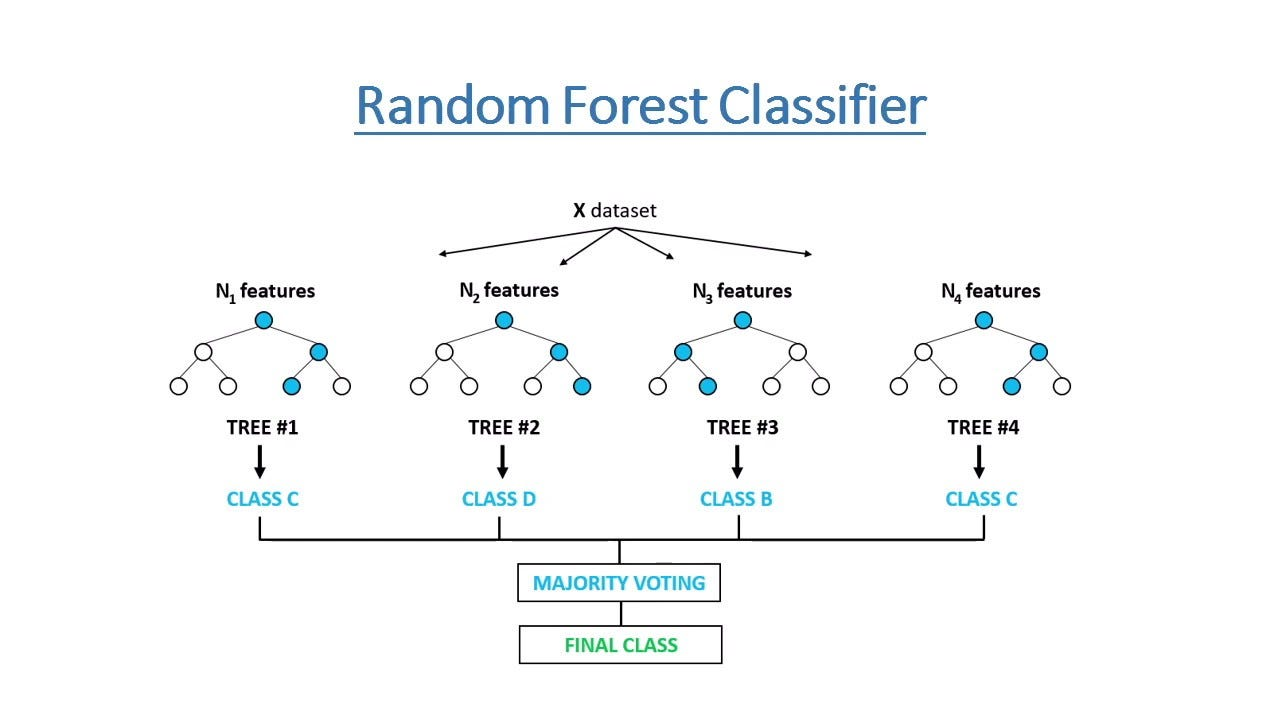

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


# Step 5: Evaluate the Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest')
plt.show()